In [47]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import os
import cv2 as cv
from sklearn.model_selection import train_test_split

/tmp/ipykernel_62970/4230877721.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


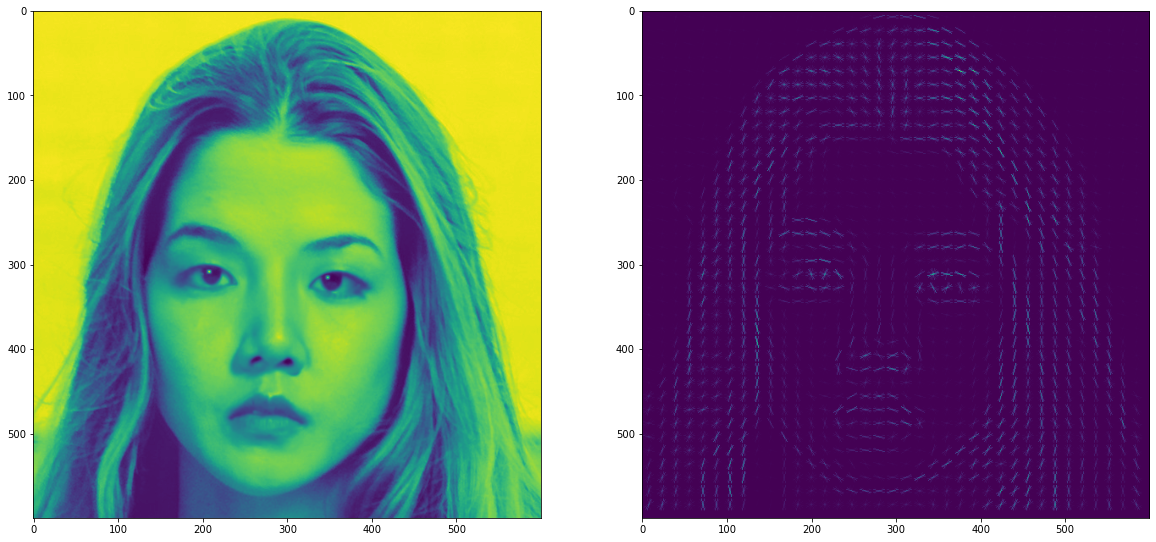

In [31]:
img = cv.imread('training_fake/'+os.listdir('training_fake')[0], cv.IMREAD_GRAYSCALE)
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(img)
ax2.imshow(hog_image)
fig.show()

In [33]:
fd

array([0.07252069, 0.07704757, 0.03118712, ..., 0.17460463, 0.10681865,
       0.12419785])

In [69]:
data = []

for path in os.listdir('training_fake')[:100]:
    image = 'training_fake/'+path
    array = cv.imread(image, cv.IMREAD_GRAYSCALE)
    fd, hog_image = hog(array, orientations=8, pixels_per_cell=(16,16), cells_per_block=(4,4), visualize=True)
    data.append((fd, 'fake'))

for path in os.listdir('training_real')[:100]:
    image = 'training_real/'+path
    array = cv.imread(image, cv.IMREAD_GRAYSCALE)
    fd, hog_image = hog(array, orientations=8, pixels_per_cell=(16,16), cells_per_block=(4,4), visualize=True)
    data.append((fd, 'real'))

data



[(array([0.1286025 , 0.00563851, 0.08409283, ..., 0.11793849, 0.22346322,
         0.14290301]),
  'fake'),
 (array([0.26472685, 0.02926209, 0.04935193, ..., 0.        , 0.        ,
         0.        ]),
  'fake'),
 (array([0.10870245, 0.05134428, 0.05414569, ..., 0.02111619, 0.07925543,
         0.03463431]),
  'fake'),
 (array([0.09175353, 0.01829947, 0.0379927 , ..., 0.12172707, 0.14778806,
         0.05989305]),
  'fake'),
 (array([0.0432205 , 0.00633297, 0.02453362, ..., 0.01117369, 0.03182582,
         0.03250383]),
  'fake'),
 (array([0.12605465, 0.10106857, 0.09684299, ..., 0.08542684, 0.06248141,
         0.06422672]),
  'fake'),
 (array([0.11512527, 0.08667836, 0.06095516, ..., 0.09663159, 0.12433297,
         0.06132142]),
  'fake'),
 (array([0.07113749, 0.        , 0.00529493, ..., 0.01590604, 0.17787924,
         0.06133476]),
  'fake'),
 (array([0.25136675, 0.04558879, 0.00260523, ..., 0.03698539, 0.03073127,
         0.02668641]),
  'fake'),
 (array([0.07401927, 0.     

In [70]:
np.random.shuffle(data)

In [71]:
df = pd.DataFrame(data, columns = ['image', 'label'])
del data
df

,image,label
0,"[0.029179027938975616, 0.01417203831910228, 0....",fake
1,"[0.16678517629275194, 0.15788201700248986, 0.1...",fake
2,"[0.11674846121590517, 0.026691688486867798, 0....",real
3,"[0.02638035855787191, 0.004356410320848659, 0....",real
4,"[0.10814714293170197, 0.04527387179496592, 0.0...",fake
...,...,...
195,"[0.05486257302839412, 0.02204741941744465, 0.0...",real
196,"[0.2228317214831725, 0.020441718321859727, 0.0...",real
197,"[0.1299080662648933, 0.07292340430320408, 0.07...",fake
198,"[0.1913615472256366, 0.17105842748374167, 0.02...",fake


In [72]:
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

In [73]:
clf = svm.SVC()

In [74]:
list(X_train)

[array([0.        , 0.        , 0.        , ..., 0.06200882, 0.20204984,
        0.1602786 ]),
 array([0.12990807, 0.0729234 , 0.07839553, ..., 0.02878913, 0.10550008,
        0.10791138]),
 array([0.08560085, 0.01595078, 0.07647973, ..., 0.01667522, 0.03447441,
        0.00643313]),
 array([0.08159992, 0.05663917, 0.04331357, ..., 0.08023054, 0.19289012,
        0.11500312]),
 array([0.03655894, 0.01845642, 0.03435883, ..., 0.02389292, 0.09598372,
        0.00660929]),
 array([0.05486257, 0.02204742, 0.01624083, ..., 0.00303889, 0.07181822,
        0.22367289]),
 array([0.107279  , 0.        , 0.0629762 , ..., 0.0022926 , 0.00968438,
        0.01125248]),
 array([0.10527713, 0.01590587, 0.05867307, ..., 0.0213183 , 0.03093918,
        0.01689827]),
 array([0.15127389, 0.0299594 , 0.08603469, ..., 0.03298224, 0.19087787,
        0.05595886]),
 array([0.10211902, 0.05251877, 0.07876548, ..., 0.08126775, 0.10336168,
        0.06629048]),
 array([0.10824979, 0.00681842, 0.11081126, ..., 0

In [75]:
clf.fit(list(X_train), y_train)

SVC()

In [76]:
y_pred = clf.predict(list(X_test))

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fake       0.67      0.71      0.69        17
        real       0.77      0.74      0.76        23

    accuracy                           0.73        40
   macro avg       0.72      0.72      0.72        40
weighted avg       0.73      0.72      0.73        40



In [78]:
print(accuracy_score(y_test, y_pred))

0.725
